# <h1 style="text-align: center;">Project 5</h1>
## <h1 style="text-align: center;">Data analysis of the online video game store for 2017 campaign  </h1>

### Introduction 
This project focuses on analyzing data from an online video game store with the goal of identifying key factors that can inform the strategy for the 2017 campaign. The dataset includes information on total sales, platforms, genres, and reviews, spanning multiple years. Our primary objective is to understand how these factors evolve over time and their impact on sales, while also considering regional differences across North America (NA), Europe (EU), and Japan (JP).

The analysis begins with data preprocessing to clean and structure the dataset for further examination. Key parameters such as platform performance, sales trends over the years, genre popularity, and the relationship between reviews and sales will be explored. Specifically, we will investigate which platforms have the highest sales, their lifespan, and the most profitable genres in terms of total sales. Additionally, we will conduct regional analyses to identify trends and differences between NA, EU, and JP markets.

By the end of the analysis, we aim to derive actionable insights that will help shape a successful campaign for 2017. The findings will provide a deeper understanding of consumer preferences and market dynamics, which can be leveraged to optimize future strategies in the gaming industry. 

In [3]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### <span style="color: blue;"> Step 1. Loading data and getting general info </span>

In [5]:
#loading dataset

games = pd.read_csv('games.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 #### <span style="color: blue;"> Step 2. Data preparation </span>

In [7]:
games.columns = games.columns.str.lower()  # uppercase to lowercase conversion of the column names
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#duplicated values
num_duplicates = games.duplicated().sum()  # no wholly duplicated rows
num_duplicates


0

In [9]:
#missing values of the 'critic_score' we fill with '0'.
games['critic_score'] = games['critic_score'].fillna(0) 

In [10]:
# missing values of 'user_score'

games['user_score'] = games['user_score'].fillna(0)  # we fill NaN values with 0.

count_tbd = games['user_score'].value_counts()['tbd']  #2424 'tbd' values, we are replacing them with average value of the column. 
count_tbd

# now we get mean value of only numeric values of the column.
numeric_user_score = pd.to_numeric(games['user_score'], errors = 'coerce') 
mean_value = numeric_user_score.mean() 

# now we replace 'tbd' with mean_value
games['user_score'] = games['user_score'].replace ('tbd', mean_value)

games['user_score']=games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


##### For 'user_score' column, we filled NaN values with 0 and 'tbd' with mean value of the column. Finally, datatype converted from 'object' into 'float'.

In [12]:
# missing values
missing_name_rows = games[games['name'].isna()]
missing_name_rows                  
#two missing 'name' column values 
#we drop these rows because other corresponding column values are missing or insignificant. Also these are old (1993year) games.
games = games.dropna(subset=['name'])  


In [13]:
#missing values
games['year_of_release'].isna().sum()   # 269 missing values     about 1.61% of total values. 
games['year_of_release'] = games.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.mean()))
games['year_of_release'].isna().sum()   


146

##### after fillna() there are still 146 missing values, it is about 0.87% of 16713 (total number values). They were not filled, because they most probably released only once (NaN year), so mean values cannot be obtianed. Taking into account the low percentage of missing values, we will drop these 146 missing values. 

In [15]:
games = games.dropna(subset = ['year_of_release'])
games['year_of_release'].isna().sum() 

0

In [16]:
#rounding and converting from float into integer
games['year_of_release'] = games['year_of_release'].round().astype('int')
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [17]:
# missing values in 'rating' column
rating_nan = games['rating'].isna().sum()    #6699 'NaN' values found. it is about 40% of the total value.
rating_nan
games['rating'] = games['rating'].fillna('unknown')

In [18]:
# total sales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


#### <span style="color: blue;"> Step 3. Data analysis </span>

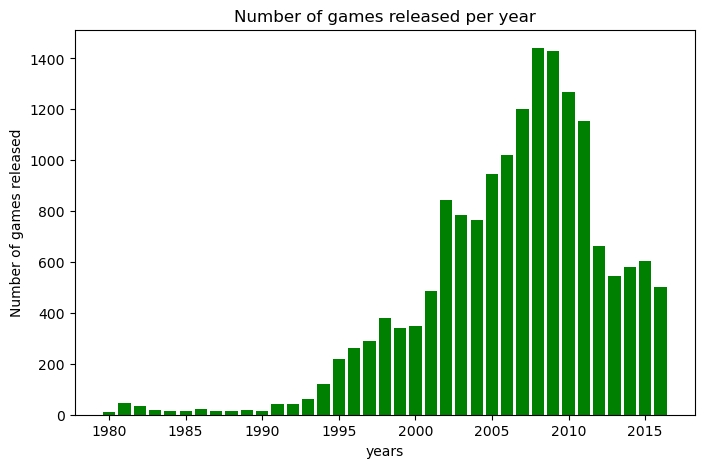

In [20]:
#how many games released each year
agg_dict = {'name':'count', 'total_sales':'sum'}
group_per_year = games.groupby('year_of_release')
games_per_year = group_per_year.agg(agg_dict).reset_index()
games_per_year

plt.figure(figsize=(8, 5))
plt.bar(games_per_year['year_of_release'], games_per_year['name'], color='green') 

plt.xlabel('years')
plt.ylabel('Number of games released')
plt.title('Number of games released per year')

plt.show()


##### From the above shown data, further we will work with games with total sales more 100. This excludes all games released 
till 1996.  

In [22]:
games_filtered = games[games['year_of_release'] >=1996]
games_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [23]:
# platforms with corresponding total sales

games_platform = games_filtered.groupby('platform')['total_sales'].sum().reset_index()
games_platform= games_platform.sort_values(by='total_sales', ascending=True)
games_platform


,platform,total_sales
10,PCFX,0.03
8,NG,0.10
19,WS,1.42
0,2600,2.53
2,DC,15.95
18,SNES,17.39
17,SAT,18.37
16,PSV,53.81
21,WiiU,82.19
4,GB,136.30


##### PS2, X360, PS3, Wii, DS are platforms with largest total sales.

In [25]:
big_platforms = ['3DS', 'PS2', 'PS3', 'PSV', 'XOne', 'PS4', 'DS', 'Wii', 'X360']
game_platforms = games_filtered[games_filtered['platform'].isin(big_platforms)]
game_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01


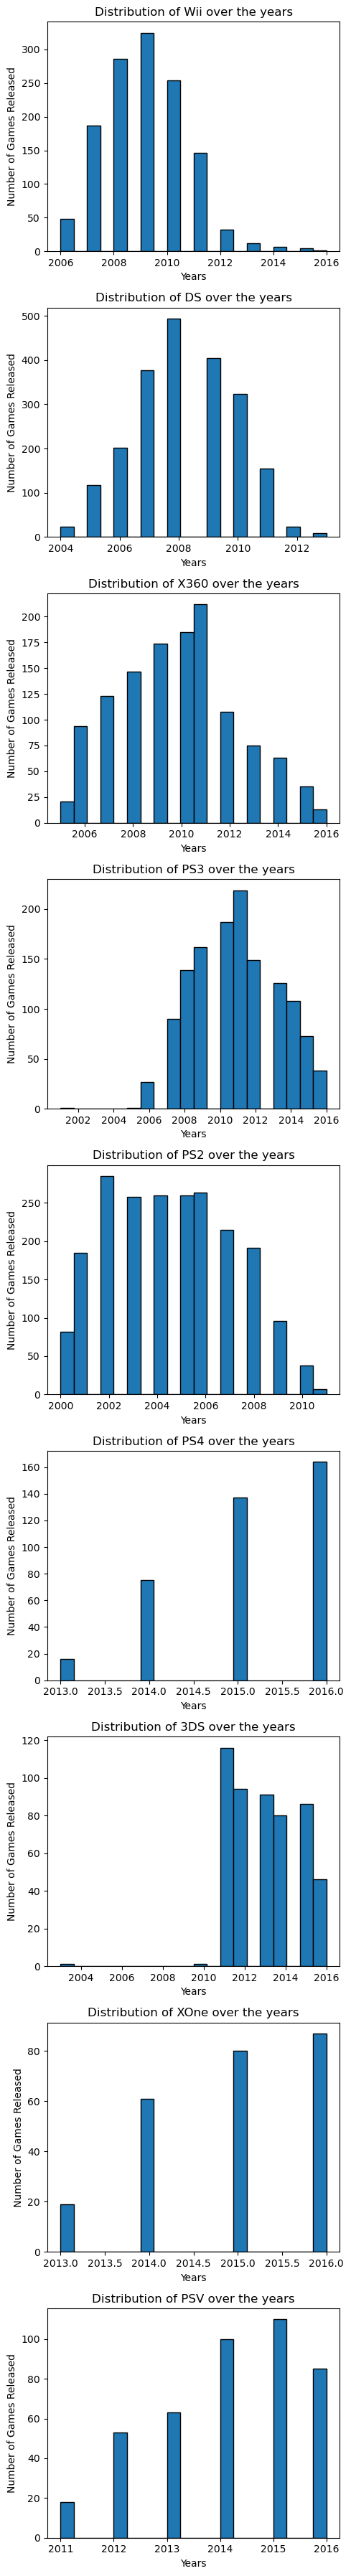

In [26]:
unique_values = game_platforms['platform'].unique()
n_subplots = len(unique_values)

fig, axes = plt.subplots(n_subplots, 1, figsize=(5, 4 * n_subplots))

for ax, value in zip(axes, unique_values):
    subset = game_platforms[game_platforms['platform'] == value]
    ax.hist(subset['year_of_release'], bins=20, edgecolor='black') 
    ax.set_title(f'Distribution of {value} over the years')
    ax.set_xlabel('Years')
    ax.set_ylabel('Number of Games Released')

plt.tight_layout()  # Moved outside the loop to adjust layout after all subplots are added
plt.show() 



##### Analysis of histograms, we observed the following: 

##### 1. 'PS4' and 'XOne', are two growing platforms. Both released in 2013.

##### 2. 'Wii', 'DS' 'PS2' and 'X360' were popular platforms in the past. Wii released in 2004 and went down to zero in about 2014. 'DS' and 'X360' released in 2005 and strongly shrinked by 2016. These histograms show that it takes about 10 years from releasing to go down to zero.

##### 3. 'PSV' platform (released in 2011) just started to shrink down.




#### To build a model for 2017, based on our analysis, we take data of 2012-2016. 

In [29]:
games_2012up = games[games['year_of_release'] >=2012]
games_2012up

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01


In [30]:
#Which platforms are leading in sales? Which ones are growing or shrinking?
games_2012up_platform = games_2012up.groupby('platform')['total_sales'].sum().reset_index()
games_2012up_platform= games_2012up_platform.sort_values(by='total_sales', ascending=False)
games_2012up_platform

,platform,total_sales
4,PS4,314.14
3,PS3,289.71
9,X360,237.52
0,3DS,195.01
10,XOne,159.32
8,WiiU,82.19
2,PC,63.51
6,PSV,49.18
7,Wii,36.60
1,DS,13.21


##### In 2012-2016 period, 'PS4', 'PS3', 'X360', '3DS', 'XOne' are the plaforms corresponding to highest total sales.  'PS4' 'XOne' are growing and 'X360', 'PS3', '3DS' are shrinking. 

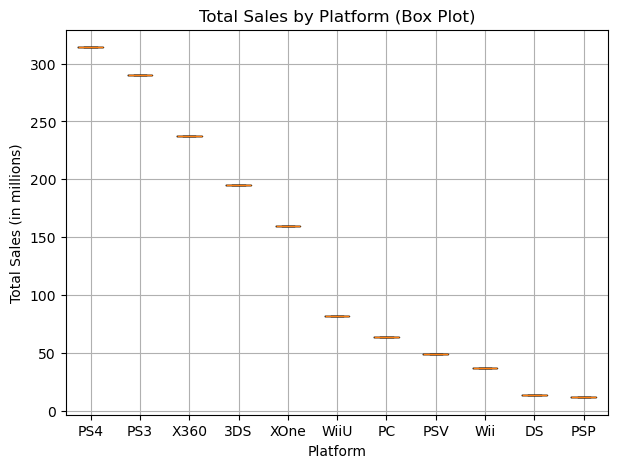

In [32]:
#boxplot analysis
plt.figure(figsize=(7, 5))
plt.boxplot([games_2012up_platform[games_2012up_platform['platform'] == platform]['total_sales'] for platform in games_2012up_platform['platform'].unique()],
            labels=games_2012up_platform['platform'].unique())
plt.title('Total Sales by Platform (Box Plot)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

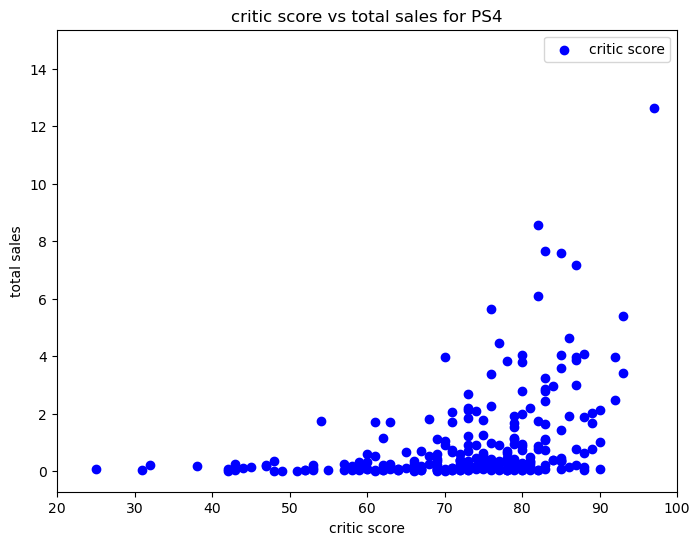

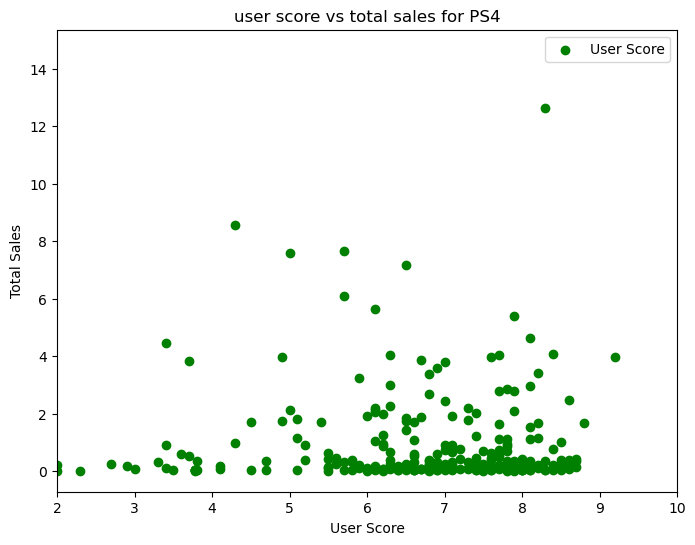

0.10626901515270536

In [33]:
# we choose 'PS4' as a popular platform 
platform = 'PS4'

platform_psv = games_2012up[games_2012up['platform'] == platform]

#scatter plot: critic_score vs total_sales
plt.figure(figsize=(8, 6))
plt.scatter(platform_psv['critic_score'], platform_psv['total_sales'], color='blue', label='critic score')
plt.title(f'critic score vs total sales for {platform}')
plt.xlabel('critic score')
plt.ylabel('total sales')
plt.xlim(20, 100)
plt.legend()
plt.show()

# build scatter plot: user score vs total sales
plt.figure(figsize=(8, 6))
plt.scatter(platform_psv['user_score'], platform_psv['total_sales'], color='green', label='User Score')
plt.title(f'user score vs total sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.xlim(2, 10)
plt.legend()
plt.show()

# Calculate Correlation
correlation_critic = platform_psv['critic_score'].corr(platform_psv['total_sales'])
correlation_user = platform_psv['user_score'].corr(platform_psv['total_sales'])
correlation_critic
correlation_user

##### correlation_critic_score vs total sales = 0.22754960627752652
##### correlation_user_score vs total sales = 0.10626901515270536

##### Both of them show weak positive correlation. 

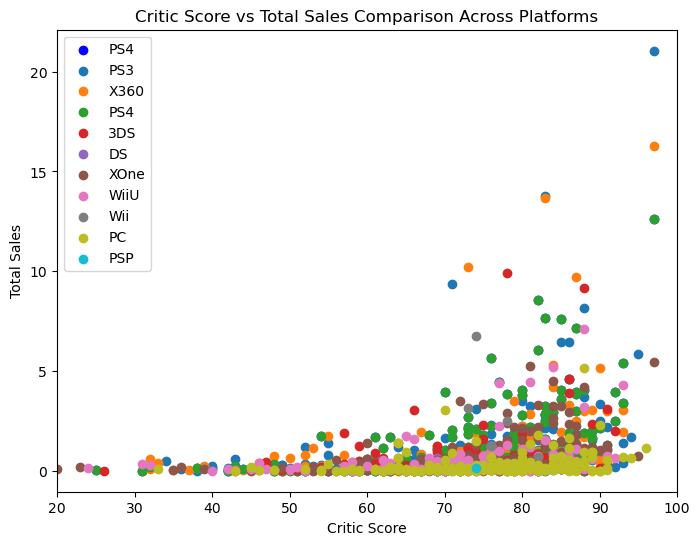

In [35]:
 #compare the sales of the same games on other platforms
platforms_other = games_2012up[games_2012up['platform'] != 'PSV']


plt.figure(figsize=(8, 6))
plt.scatter(platform_psv['critic_score'], platform_psv['total_sales'], color='blue', label='PS4')

# Scatter plots for other platforms
for platform in platforms_other['platform'].unique():
    platform_data = platforms_other[platforms_other['platform'] == platform]
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'], label=platform)

plt.title('Critic Score vs Total Sales Comparison Across Platforms')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.xlim(20, 100)
plt.legend()
plt.show()


##### The plot shows similar weak positive correlation. 


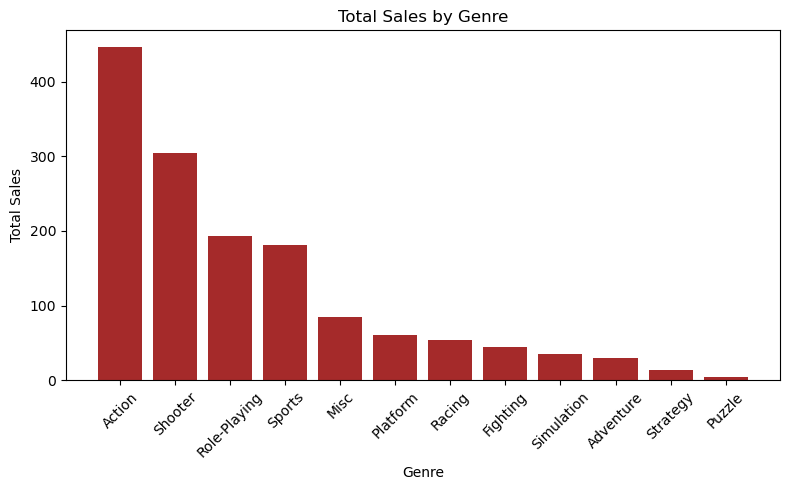

In [37]:
# we study the total sales by genre

genre_sales = games_2012up.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plotting the distribution of sales by genre
plt.figure(figsize=(8, 5))
plt.bar(genre_sales.index, genre_sales.values, color='brown')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

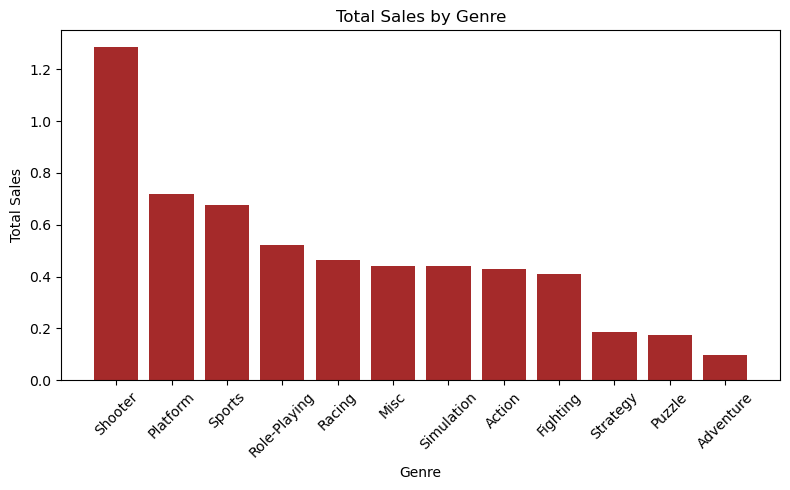

In [38]:
#here, we study the average of total sales by genre
genre_sales = games_2012up.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plotting the distribution of sales by genre
plt.figure(figsize=(8, 5))
plt.bar(genre_sales.index, genre_sales.values, color='brown')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The figure indicates that the highest profitable genre is 'Action'. In addition, 'Shooter', 'Role-Playing' and 'Sports' are high profitable genres. These genres have broad audience with high market demand. In conrast, 'Puzzle' is the lowest profitable genre. Similarly, 'Strategy' and 'Adventure', are low profitable genres. These genres are demand of narrow audience and less popular. In addition to the genre, the total sales depend also on other factors such as marketing, local economic situation etc. For more detailed analysis, in the next section we study the dependence of total sales on regions. 

#### <span style="color: blue;"> Step 4. Create a user profile for each region.</span>


In [41]:
#NA region
exclude_eu_jp = ['eu_sales', 'jp_sales', 'other_sales', 'total_sales']
games_2012up_na = games_2012up.drop(columns = exclude_eu_jp)

#EU region
exclude_na_jp = ['na_sales', 'jp_sales', 'other_sales', 'total_sales']
games_2012up_eu = games_2012up.drop(columns = exclude_na_jp)

#JP region
exclude_na_eu = ['na_sales', 'eu_sales', 'other_sales', 'total_sales']
games_2012up_jp = games_2012up.drop(columns = exclude_na_eu)


#### Below we check the top five platform for each region.

In [43]:
na_platform = games_2012up_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_platform


,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49
5,WiiU,38.10
6,PC,19.26
7,Wii,18.14
8,PSV,10.98
9,DS,4.93


In [44]:
eu_platform = games_2012up_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_platform

,platform,eu_sales
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83
5,PC,38.38
6,WiiU,25.13
7,Wii,12.34
8,PSV,11.36
9,DS,3.78


In [45]:
jp_platform = games_2012up_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_platform

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.71
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


#### Top five platforms for each region: 

1. NA   -  'X360', 'PS4', 'PS3', 'XOne', '3DS'
2. EU   -  'PS4', 'PS3', 'X360', 'XOne', 3DS'
3. JP   -  '3DS', 'PS3', 'PSV', 'PS4', 'WiiU'

##### Common top five platforms for all three regions: 'PS4', 'PS3', '3DS'.  'PS3' is in top three platforms for all three regions. 
##### Common for NA and EUs:  'PS4'.  it is among the top two platforms for these regions. 


#### Below, we figure out top five genres for each region.

In [48]:
na_genre = games_2012up_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_genre

,genre,na_sales
0,Action,180.15
1,Shooter,144.79
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


In [49]:
eu_genre = games_2012up_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_genre

,genre,eu_sales
0,Action,161.70
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [50]:
jp_genre = games_2012up_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_genre

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


#### Top five genres for each region: 

1. NA  -  'Action', 'Shooter', 'Sports', 'Role_Playing', 'Misc'; 
2. EU  -  'Action', 'Shooter', 'Sports', 'Role_Playing', 'Racing';
3. JP  -  'Role_Playing', 'Action', 'Misc', 'Simulation', 'Fighting'.

##### Common top five platforms for all three regions: 'Action', 'Role-Playing'.  'Action' is in top two platforms for all three regions.

##### 'Sports' is in the top five genres for NA and EU region, while it is not For JP region. 
##### 'Simulation' is among top five for JP, while it is not for EU and NA regions.
 

#### <span style="color: blue;"> Next we figure out whether the ratings affect sales of the regions.</span>

In [53]:
na_genre = games_2012up_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_genre

,rating,na_sales
0,M,231.67
1,E,114.37
2,unknown,103.31
3,E10+,77.93
4,T,66.02


In [54]:
eu_genre = games_2012up_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_genre

,rating,eu_sales
0,M,194.44
1,E,113.03
2,unknown,91.50
3,E10+,57.25
4,T,52.96


In [55]:
jp_genre = games_2012up_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_genre

,rating,jp_sales
0,unknown,109.08
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


In [56]:
games_2012up['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

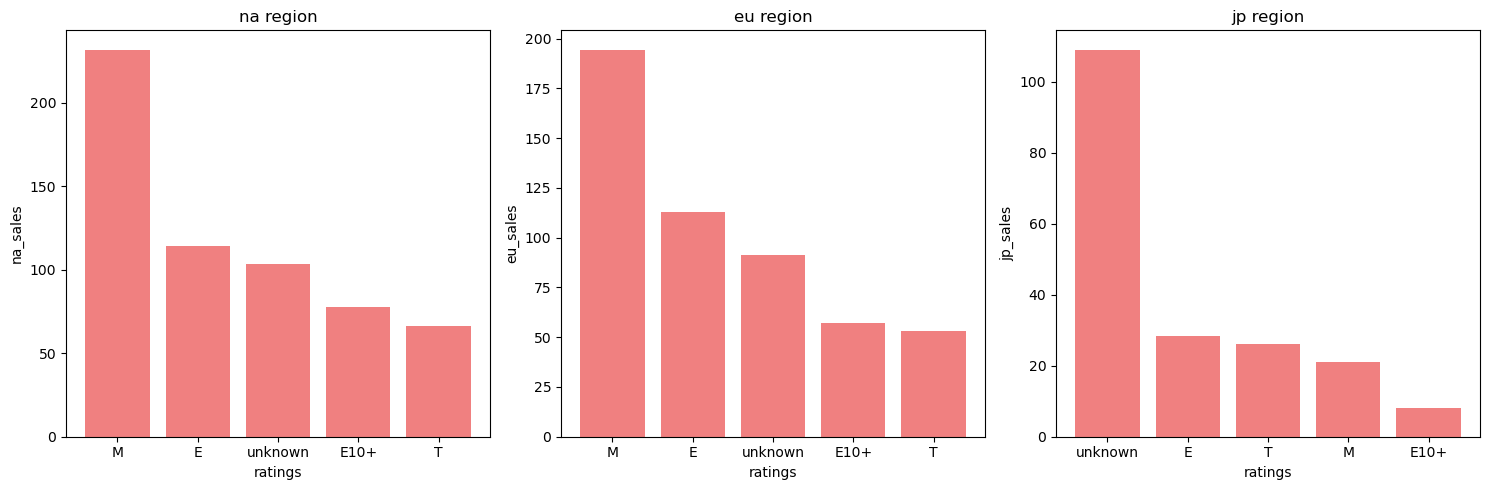

In [57]:
# bar plot of ratings for all three regions

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# na bar plot
axs[0].bar(na_genre['rating'], na_genre['na_sales'], color='lightcoral')
axs[0].set_title('na region')
axs[0].set_xlabel('ratings')
axs[0].set_ylabel('na_sales')

# Plot the second bar plot
axs[1].bar(eu_genre['rating'], eu_genre['eu_sales'], color='lightcoral')
axs[1].set_title('eu region')
axs[1].set_xlabel('ratings')
axs[1].set_ylabel('eu_sales')

# Plot the third bar plot
axs[2].bar(jp_genre['rating'], jp_genre['jp_sales'], color='lightcoral')
axs[2].set_title('jp region')
axs[2].set_xlabel('ratings')
axs[2].set_ylabel('jp_sales')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### For all three regions 'E(everyone)' rating is popular and mostly sold games.

#### <span style="color: blue;"> Step 5. Statistical Test of Hypotheses.</span>

In [60]:
#Average user ratings of the Xbox One and PC platforms are the same.
# First we filter the data for two platforms. 
#We test hypothesis on equality of the two independent population means:
#H0 (0 hypothesis) - means of two populations are equal;
#H1 (alternative hypothesis) - means of two populations are not equal;

XOne_rating = games_2012up[games_2012up['platform']=='XOne']['user_score']
PC_rating = games_2012up[games_2012up['platform']=='PC']['user_score']

alpha = 0.09

t_stat, p_value = st.ttest_ind(XOne_rating, PC_rating)

print(t_stat)
print(p_value)

if p_value <= alpha:
    print('Reject nul hypothesis. The mean values are not equal.')
else:
    print('Accept null hypothesis. The mean values are equal.')



-1.6986539718739488
0.09000649557527764
Accept null hypothesis. The mean values are equal.


##### The above performed hypothesis test shows that: 
##### 1. when alpa<=0.09 we accept hull hypothesis, so mean values of XOne_rating and PC_rating are equal. 
##### 2. when alpa>=0.1, we reject null hypothesis: mean values of XOne_rating and PC_rating are not equal. 

In [62]:
#Average user ratings for the Action and Sports genres are different.
# First we filter the data for two platforms. 
#Again we test hypothesis on equality of the two independent population means, but here our hypothesis will be diffrenet:
#H0 (0 hypothesis) - means of two populations are not equal;
#H1 (alternative hypothesis) - means of two populations are equal;

Action_rating = games_2012up[games_2012up['genre']=='Action']['user_score']
Sports_rating = games_2012up[games_2012up['genre']=='Sports']['user_score']

alpha = 0.05

t_stat, p_value = st.ttest_ind(Action_rating, Sports_rating)

print(t_stat)
print(p_value)

if p_value <= alpha:
    print('Accept nul hypothesis. The mean values are not equal.')
else:
    print('Reject null hypothesis. The mean values are equal.')


-2.511501423788312
0.01214168088851893
Accept nul hypothesis. The mean values are not equal.


##### The above performed hypothesis test shows that: 
##### 1. when alpa<=0.01 we reject hull hypothesis, so mean values of Action_rating and Sports_rating are equal. 
##### 2. when alpa>=0.02, we accept null hypothesis: mean values of Action_rating and Sports_rating are not equal. 

# Conclusions
In this analysis of the games dataset covering the period from 1980 to 2016, we focused on key factors such as platform popularity, platform lifecycle, total sales, and genre performance. For the 2017 campaign, we specifically examined data from 2012 to 2016 and analyzed it across three major regions: North America (NA), Europe (EU), and Japan (JP).

Key findings include:

1. Platform Sales Trends (2012-2016): The platforms with the highest total sales during this period were the 'PS4', 'PS3', 'X360', '3DS', and 'XOne'. Among these, 'PS4' and 'XOne' are showing growth, while 'X360', 'PS3', and '3DS' are experiencing a decline in sales.

2. Genre Profitability: The most profitable genre is 'Action', followed by 'Shooter', 'Role-Playing', and 'Sports'. These genres appeal to broad audiences, resulting in high demand. In contrast, 'Puzzle' is the least profitable, with 'Strategy' and 'Adventure' also performing poorly. These genres tend to cater to niche audiences, leading to lower popularity.

3. Correlation between Reviews and Sales: There is a weak positive correlation (ranging from 0.1 to 0.2) between user reviews and total sales, suggesting that reviews have a modest impact on sales figures.

4. Regional Differences: The data analysis reveals that sales and platform preferences are quite similar between the NA and EU regions, while the JP region shows some noticeable differences in gaming preferences and sales patterns.

5. Statistical Analysis Results: Hypothesis testing revealed:

No significant difference in average user ratings between the 'Xbox One' and 'PC' platforms.
A statistically significant difference in user ratings between the 'Action' and 'Sports' genres, indicating different audience perceptions of these genres.
Overall, this analysis provides valuable insights for the 2017 campaign, highlighting key platforms, profitable genres, and regional trends that can inform strategic decisions in the gaming industry.
